In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [59]:
df =pd.read_csv(r"C:\Users\PC\Downloads\Telegram Desktop\homicide_by_countries.csv  ")
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [10]:
df.shape

(195, 6)

In [11]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


In [13]:
df.describe

<bound method NDFrame.describe of         Location    Region           Subregion  Rate  Count  Year
0    Afghanistan      Asia       Southern Asia   6.7   2474  2018
1        Albania    Europe     Southern Europe   2.1     61  2020
2        Algeria    Africa     Northern Africa   1.3    580  2020
3        Andorra    Europe     Southern Europe   2.6      2  2020
4         Angola    Africa       Middle Africa   4.8   1217  2012
..           ...       ...                 ...   ...    ...   ...
190    Venezuela  Americas       South America  36.7  10598  2018
191      Vietnam      Asia  South-Eastern Asia   1.5   1358  2011
192        Yemen      Asia        Western Asia   6.8   1703  2013
193       Zambia    Africa      Eastern Africa   5.4    853  2015
194     Zimbabwe    Africa      Eastern Africa   7.5    981  2012

[195 rows x 6 columns]>

In [14]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [ ]:
df['Rate'] = df['Rate'].astype(int)

In [16]:
my_list =['Rate', 'Count','Year']
for i in my_list:
    print(i)
    df[i] = df[i].astype(int)

Rate
Count
Year


In [17]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [18]:
df = df.sort_values ('Count', ascending = False )
df

,Location,Region,Subregion,Rate,Count,Year
26,Brazil,Americas,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,Americas,Central America,28,36579,2020
186,United States,Americas,Northern America,6,21570,2020
...,...,...,...,...,...,...
73,Holy See,Europe,Southern Europe,0,0,2015
38,Channel Islands,Europe,Northern Europe,0,0,2010
145,Saint Helena,Africa,Western Africa,0,0,2009
151,San Marino,Europe,Southern Europe,0,0,2011


In [ ]:
## location with the highest count ##

In [20]:
df.columns

Index(['Location', 'Region', 'Subregion', 'Rate', 'Count', 'Year'], dtype='object')

In [27]:
df1 =df[['Location','Count']].sort_values(by = 'Count', ascending = False).head(5)
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


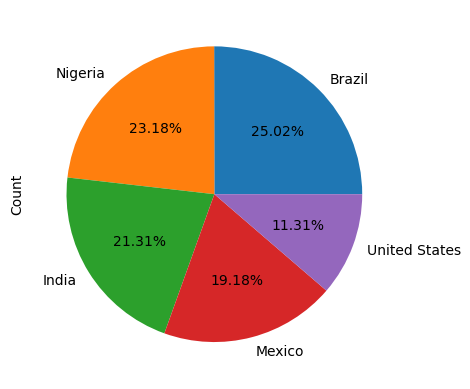

In [35]:
df1.plot(x='Location',y='Count', kind ='pie', labels = df1.Location, autopct= '%1.2f%%')
plt.legend().set_visible(False)

In [76]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
df2

Region
Americas    153597
Asia        105552
Africa       99481
Europe       19869
Oceania        347
Name: Count, dtype: int64

<Axes: xlabel='Region'>

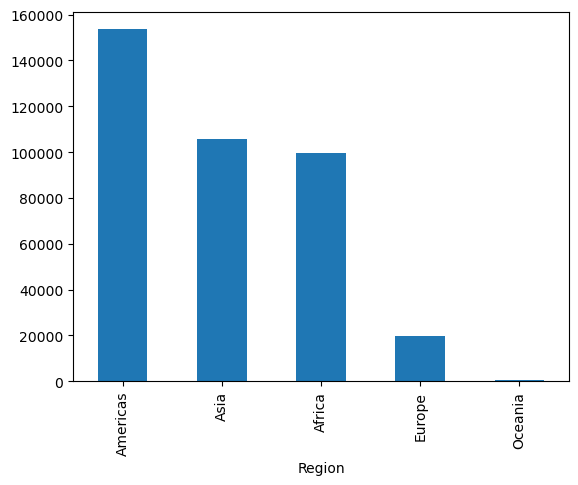

In [77]:
df2.plot(kind ='bar')

In [71]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending = False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

In [73]:
df3.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [74]:
df3.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347], dtype=int64)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'South America'),
  Text(1, 0, 'Southern Asia'),
  Text(2, 0, 'Central America'),
  Text(3, 0, 'Western Africa'),
  Text(4, 0, 'South-Eastern Asia'),
  Text(5, 0, 'Eastern Africa'),
  Text(6, 0, 'Northern America'),
  Text(7, 0, 'Southern Africa'),
  Text(8, 0, 'Eastern Europe'),
  Text(9, 0, 'Western Asia'),
  Text(10, 0, 'Eastern Asia'),
  Text(11, 0, 'Northern Africa'),
  Text(12, 0, 'Caribbean'),
  Text(13, 0, 'Middle Africa'),
  Text(14, 0, 'Northern Europe'),
  Text(15, 0, 'Western Europe'),
  Text(16, 0, 'Central Asia'),
  Text(17, 0, 'Southern Europe'),
  Text(18, 0, 'Australia, New Zealand')])

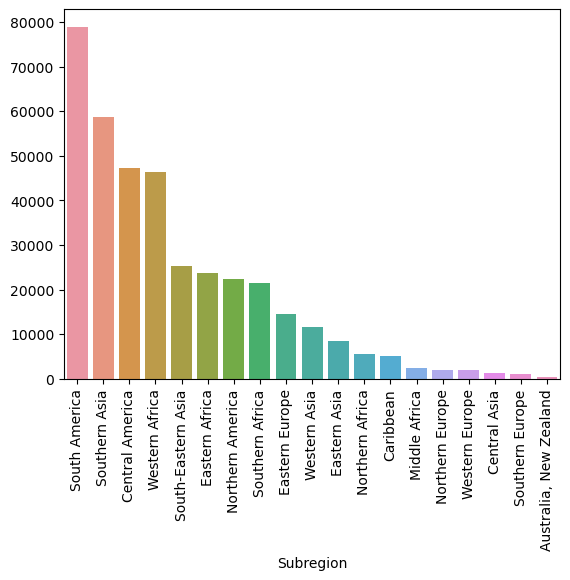

In [78]:
sns.barplot (x = df3.index, y=df3.values)
plt.xticks(rotation = 90)

In [79]:
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [80]:
df[df['Region'].isin(['Asia', 'Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
8,Armenia,Asia,Western Asia,1.8,52,2020
11,Austria,Europe,Western Europe,0.7,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0.7,64,2019
184,United Kingdom,Europe,Northern Europe,1.1,755,2018
189,Uzbekistan,Asia,Central Asia,1.2,396,2019
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011


In [82]:
df4 = df[(df['Region']=='Asia') | (df['Region']== 'Europe')]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
8,Armenia,Asia,Western Asia,1.8,52,2020
11,Austria,Europe,Western Europe,0.7,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0.7,64,2019
184,United Kingdom,Europe,Northern Europe,1.1,755,2018
189,Uzbekistan,Asia,Central Asia,1.2,396,2019
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011


In [89]:
df5 = df.groupby(['Year'])['Rate'].sum().sort_values(ascending = False )
df5

Year
2020    608.0
2019    161.0
2012    119.5
2016     78.8
2018     70.0
2015     58.5
2014     54.2
2009     39.5
2017     30.3
2021     28.4
2013     21.7
2007     19.0
2010     18.2
2006     12.5
2011     10.1
2008      5.1
Name: Rate, dtype: float64

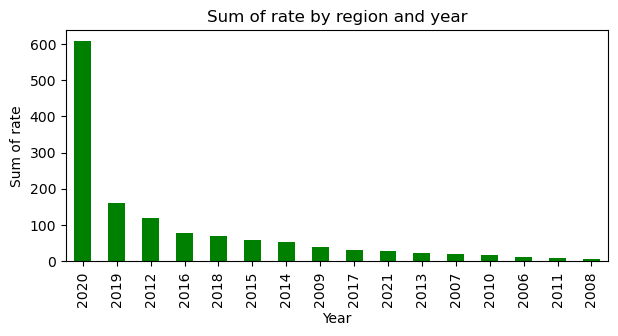

In [90]:
df5.plot(kind = 'bar', figsize =(7,3),color ='green')
plt.xlabel('Year')
plt.ylabel('Sum of rate')
plt.title('Sum of rate by region and year')
plt.show()

In [96]:
df6 = df.groupby('Subregion')['Count'].mean().sort_values(ascending = False).round(2)
df6

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [97]:
df6.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [98]:
data={
    'Category':df6.index,
    'Value':df6.values,
    'Info':df6.values
}
df = pd.DataFrame(data)
df

,Category,Value,Info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


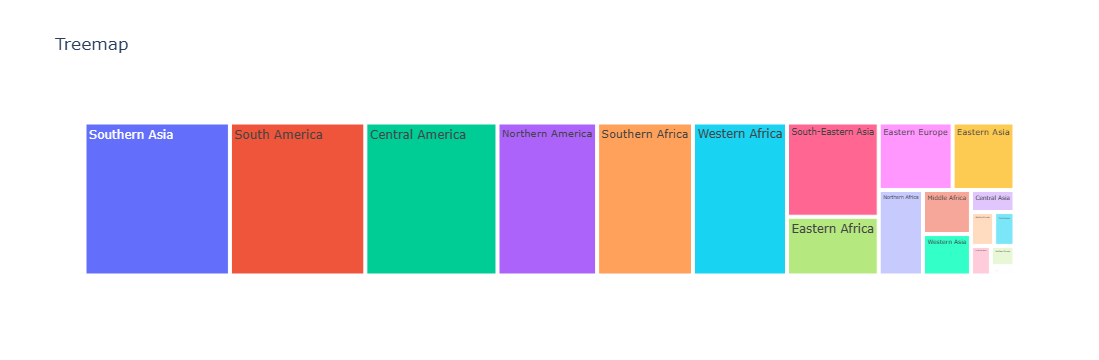

In [102]:
fig = px.treemap(df,path =['Category'], values ='Value', title = 'Treemap')
fig.update_traces(hovertemplate = 'Category:%{label}<br>Value:{value}')
fig.show()